    
# TP2 : Import d'un fichier CSV et export vers un fichier CSV

<div class = "alert alert-danger" >  
    
 Fonctionnement de Jupyter:
    
- Une fois que vous avez complété la cellule en Python, cliquez sur le bouton `Exécuter` en haut à gauche.<br>
Si besoin, vous pouvez rajouter des cellules de code avec le bouton `+` situé en haut à gauche

    
- Je vous conseille d'ouvrir le notebook de correction dans un onglet à côté et de progresser à votre rythme. Si vous bloquez trop longtemps sur une question ,utilisez la correction et n'hésitez pas à me contacter sur Atrium si la correction ne vous aide pas davantage.
    
    
- Si des bugs étranges arrivent, n'hésitez pas à redémarrer le Kernel (menu Kernel > restart and Clear Output) et à exécuter les cellules depuis le début. Il peut arriver qu'une variable ait été modifiée lors d 'une fausse manipulation et ensuite ça fait planter tout le reste.
    

- En cas de non utilisation du notebook pendant une dizaine de minutes, un message apparaîtra pour vous informer qu'il y a eu une déconnexion du serveur; le notebook devient alors inexploitable.<br>
Pour le relancer, appuyer sur le bouton ``Copy Binder link`` (en haut à droite) et recopier le lien (par un CTLR V) dans la barre d'adresses.
    </div>

## 1. Import d'un fichier CSV dans Python

L'objectif de cette partie est d'apprendre à importer un fichier csv en Python et d'obtenir une liste de dictionnaires comme cela a été vu en cours.

Reprenons l'exemple vu en cours :


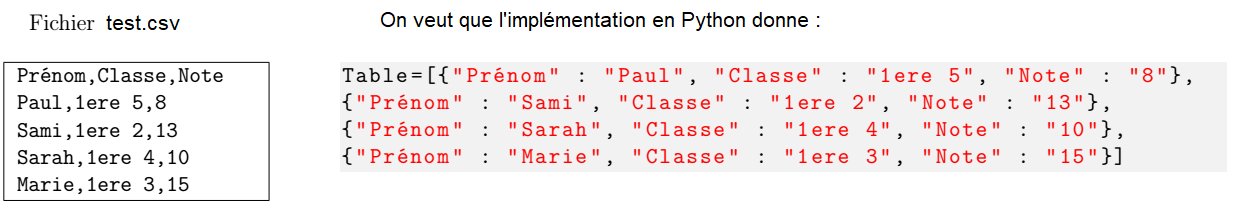


<div class = "alert alert-info"> 
    
**Propriété (Import d'un fichier csv)**

- La bibliothèque `csv` implémente des classes pour lire des données tabulaires au format CSV.

- La fonction `reader` du module csv renvoie un objet de type csv.reader qui est itérable. 
Chaque élément de cet objet est une liste.

- La fonction `DictReader` du module csv renvoie un objet de type csv.DictReader itérable aussi. 
Chaque élément de cet objet est une liste de tuple à 2 éléments. La première ligne du fichier csv se retrouve être les premiers éléments de chaque tuple.


On utilisera le fichier `test.csv`  vu en cours à télécharger [ici : fichier test.csv](https://www.atrium-sud.fr/group/1nsi-404602/documents?p_p_id=20&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&p_p_col_id=column-1&p_p_col_count=1&_20_redirect=https%3A%2F%2Fwww.atrium-sud.fr%2Fgroup%2F1nsi-404602%2Fdocuments%3Fp_p_id%3D20%26p_p_lifecycle%3D0%26p_p_state%3Dnormal%26p_p_mode%3Dview%26p_p_col_id%3Dcolumn-1%26p_p_col_count%3D1%26_20_displayStyle%3D%26_20_entryStart%3D0%26_20_viewFolders%3D1%26_20_folderStart%3D0%26_20_action%3DbrowseFolder%26_20_viewEntries%3D1%26_20_folderEnd%3D75%26_20_entryEnd%3D75%26_20_folderId%3D366727263%26_20_struts_action%3D%252Fdocument_library%252Fview&_20_folderId=372000518&_20_struts_action=%2Fdocument_library%2Fview) puis **à uploader dans Jupyter dans le même répertoire que votre notebook.** 

Utilisons tout d'abord la fonction `reader` qui va permettre de lire le fichier CSV avec Python.







In [ ]:
import csv # import du module pour lire les fichiers csv

In [ ]:
fichier_csv = open("test.csv" , "r", encoding = "UTF-8") # ouvrir le fichier en mode "r" i.e en mode lecture
lecteur_csv = csv.reader(fichier_csv, delimiter = ",") # initialisation d’un lecteur de fichier
type(lecteur_csv)

Le type renvoyé par la fonction reader paraît assez abstrait et peu exploitable mais on va utiliser sa propriété d'itérable pour afficher le contenu du fichier CSV avec Python.

In [ ]:
fichier_csv = open("test.csv", "r",encoding="UTF-8") # ouvrir le fichier en mode "r" i.e en mode lecture et
#en choisissant l'encodage UTF-8
lecteur_csv = csv.reader(fichier_csv , delimiter = ",") # initialisation d’un lecteur de fichier qui transforme les lignes
# en liste, delimiter est facultatif ici
for ligne in lecteur_csv : # parcours du lecteur avec une boucle
    print(ligne) # affichage ligne à ligne
fichier_csv.close () # fermeture du fichier

<div class = "alert alert-info"> 
    
### A faire vous-même 1
    
    
Ecrire une fonction `import_csv_list_de_list(fichierCSV)` où fichierCSV est une chaine de caractères représentant le nom du fichier CSV et qui renvoie une liste de listes avec la fonction reader :

a) en construisant la liste par extension;<br>
b) en construisant la liste par compréhension

Par exemple `import_csv_list_de_list('test.csv')` renvoie : <br> 
[['Prénom', 'Classe', 'Note'], ['Paul', '1ere 5', '8'], ['Sami', '1ere 2', '13'], ['Sarah', '1ere 4', '10'], ['Marie', '1ere 3', '15']]


    

In [ ]:
#a)
def import_csv_list_de_list(fichierCSV):
    L=[]
    fichier_csv = open("test.csv", "r",encoding="UTF-8")
    lecteur_csv = csv.reader(fichier_csv , delimiter = ",")
    for ligne in lecteur_csv:
        L.append(ligne)
    return L

import_csv_list_de_list('test.csv')  

#b) 
def import_csv_list_de_list(fichierCSV):
    fichier_csv = open("test.csv", "r",encoding="UTF-8")
    lecteur_csv = csv.reader(fichier_csv , delimiter = ",")
    return [ligne for ligne in lecteur_csv]
    
import_csv_list_de_list('test.csv')

**Remarque** : La présentation d'une table sous la forme d'une liste de listes n'est pas satisfaisante car elle ne permet pas d'accéder et de traiter facilement (voire automatiquement) les données.

En effet, par exemple pour accéder à la classe de Sarah  '1ere 4',  il faut saisir import_csv_list_de_list(test.csv)[3][1], ce qui demande un peu de réflexion...

La fonction *reader* n'étant pas efficace, on va s'intéresser à la fonction *DictReader* qui va nous permettre de travailler avec des dictionnaires.<br>
Testons cette fonction *DictReader* pour décrire plus précisément son fonctionnement.



In [ ]:
file = open("test.csv" , "r", encoding="UTF-8") 
csv_en_dico = csv.DictReader(file , delimiter = ",") # initialisation d’un lecteur de fichier avec création automatique de dictionnaire
for ligne in csv_en_dico : # parcours du lecteur avec une boucle
    print(ligne) # affichage ligne à ligne
file.close () # fermeture du fichier

Chaque ligne est précédée de "OrderedDict" à partir de la version 3.6 de Python.<br> 
Ce nouveau type de variable est comme son nom l'indique un dictionnaire **ordonné**.(L'ordre des clés a une importance, contrairement aux dictionnaires usuels)<br> 
Comme pour les dictionnaires usuels, ce sont des objets itérables et les
méthodes vues précédemment .keys(), .values() et .items() fonctionnent de la
même manière .<br>
Ce sont des listes de couples (tuples à deux éléments) composés de la clé et de la valeur.

On peut les transformer  en  de "vrais dictionnaires" avec la fonction *dict* qui transforme une liste de couples en un dictionnaire.

Enfin, on peut travailler sur ces dictionnaires ordonnés à l'aide du module *collections* (structures de données)

In [ ]:
from collections import OrderedDict
print(type(OrderedDict([('Prénom', 'Paul'), ('Classe', '1ere 5'), ('Note', '8')])))
dict(OrderedDict([('Prénom', 'Paul'), ('Classe', '1ere 5'), ('Note', '8')]))



<div class = "alert alert-info">  
    
    
### A faire vous-même 2
    
1. Ecrire un fonction `import_csv(fichierCSV)` qui reçoit un paramètre le nom du `fichierCSV` (avec son extension) de type chaine de caractère  et qui retourne une liste de dictionnaires qui contient les données du fichier csv :

a) en construisant le dictionnaire par extension;<br>
b) en construisant le dictionnaire par compréhension

Vous testerez votre fonction sur le fichier `test.csv`

2. En utilisant la fonction précédente, déterminer la liste des notes des élèves figurant dans les données de `test.csv`


In [ ]:
def import_csv(nom_fichierCSV): 
    fichier_csv = open(nom_fichierCSV, 'r',encoding = 'UTF-8')
    lecteur_csv= csv.DictReader(fichier_csv, delimiter = ",")
    liste_dicos=[dict(dico_ord) for dico_ord in lecteur_csv]
    fichier_csv.close()
    return liste_dicos

In [ ]:
table_eleves = import_csv('test.csv')
table_eleves

In [ ]:
notes_eleves=[dico['Note'] for dico in table_eleves]
notes_eleves

<div class="alert alert-info">

## 2. Export vers un fichier CSV

Maintenant nous savons ouvrir un fichier csv en l'affichant sous la forme d'une table en Python i.e sous la forme d'une liste de dictionnaires.<br> 
L'objectif de ce paragraphe est de faire  maintenant l'inverse : on part d'une liste de dictionnaire puis on crée le fichier CSV correspondant.

Voici le programme détailler qui permet de créer un tel fichier CSV.<br>
Analyser le code ci-dessous

In [ ]:
from collections import*
def creer_csv(table_donnees, nom_fichier):
    """
    Crée un fichier csv à partir d'une table de données. 
    - table_donnees : liste de dictionnaires 
    - nom_fichier : chaine de caractères, la logique veut qu'elle finisse par l'extension .csv
    """
    en_tete = list(table_donnees[0].keys())# liste des clés qui vont constituer les entêtes
    table=[OrderedDict(dico) for dico in table_donnees] #table des dictionnaires ordonnés
    fichier_csv = open(nom_fichier, "w", encoding="UTF-8",newline = "")  #Ouverture d'un fichier CSV en écriture (w) qui est créée si celui-ci n'existe pas            
    ecriture_csv = csv.DictWriter(fichier_csv, delimiter =",",fieldnames = en_tete) #la fonction DictWriter renvoie 
    #un objet ecriture_csv qui permet d'écrire les lignes du fichier csv

    ecriture_csv.writeheader()  #Ecriture de la première ligne
    ecriture_csv.writerows(table) #Ecriture dans fichier_csv de chaque ligne de la table correspondant à 
    # des dictionnaires  ordonnés 
        
    fichier_csv.close()
    return



<div class="alert alert-info">
    
Tester la fonction `creer_csv` avec la table ci-dessous puis vérifier le fichier que l'on nommera `exemple.csv` a bien été créé et vérifier son contenu.

In [ ]:
table_exemple=[{'nom': 'Dupont', 'prenom': 'Jean-Claude', 'age': '32'},
 {'nom': 'Duteil', 'prenom': 'Paul', 'age': '41'},
 {'nom': 'Claudon', 'prenom': 'Goery', 'age': '37'},
 {'nom': 'Tonton', 'prenom': 'Pierre', 'age': '54'},
 {'nom': 'Penard', 'prenom': 'Bob', 'age': '18'},
 {'nom': 'Herpoix', 'prenom': 'Stephane', 'age': '55'},
 {'nom': 'Salicorne', 'prenom': 'Bruno', 'age': '15'},
 {'nom': 'Poiteau', 'prenom': 'Maxe', 'age': '33'},
 {'nom': 'Clanget', 'prenom': 'Gilles', 'age': '54'},
 {'nom': 'Luillier', 'prenom': 'Martin', 'age': '34'},     
 {'nom': 'Clanget', 'prenom': 'Justine', 'age': '14'},
 {'nom': 'Gillier', 'prenom': 'Paul', 'age': '16'}]

creer_csv(table_exemple,'exemple.csv')

<div class="alert alert-info">

### A faire vous-même 3

L'objectif de cette exercice est d'obtenir un outil qui permet d'insérer un nouvel enregistrement dans le fichier `text.csv`.

Ecrire une fonction `ajouter_test_csv(prenom, classe, note)` qui va permettre l'implémentation d'un nouvel enregistrement.<br>
Tester cette fonction en ajoutant l'enregistrement Claude, 1ere 1, 18

In [ ]:
def ajouter_test_csv(prenom, classe, note): #les arguments sont de type str
    liste_dico=import_csv('test.csv')
    liste_dico.append({'Prénom':prenom, 'Classe':classe, 'Note': note})
    creer_csv(liste_dico,'test.csv')
    
    
ajouter_test_csv('Claude','1ere 1', '18')

## 3. Exemple d'une base de données plus importante

<br>
<div class='alert-info'>
    
### A faire vous-même 4 :
    
Télécharger le fichier [films.csv](https://www.atrium-sud.fr/group/1nsi-404602/documents?p_p_id=20&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&p_p_col_id=column-1&p_p_col_count=1&_20_redirect=https%3A%2F%2Fwww.atrium-sud.fr%2Fgroup%2F1nsi-404602%2Fdocuments%3Fp_p_id%3D20%26p_p_lifecycle%3D0%26p_p_state%3Dnormal%26p_p_mode%3Dview%26p_p_col_id%3Dcolumn-1%26p_p_col_count%3D1%26_20_displayStyle%3D%26_20_entryStart%3D0%26_20_viewFolders%3D1%26_20_folderStart%3D0%26_20_action%3DbrowseFolder%26_20_viewEntries%3D1%26_20_folderEnd%3D75%26_20_entryEnd%3D75%26_20_folderId%3D366727263%26_20_struts_action%3D%252Fdocument_library%252Fview&_20_folderId=372000518&_20_struts_action=%2Fdocument_library%2Fview) puis l'uploader dans le même répertoire que votre notebook.
</div>

Les données proviennent de The Movie DataBase, et correspondent
 aux films les plus appréciés sur une semaine donnée. 
 
Un film sera décrit en particulier ici par les attributs : titre, année de sortie, durée, langue
originale, genre, recettes

<div class='alert-danger'>
    
### Remarque importante :
Pour une base de données assez importante, on rajoute en plus un **identifiant** qui permet de différencier de façon unique les différents enregistrements (ou objets).<br>
    L'identifiant unique permet de différencier  ainsi plusieurs données dont certains champs sont
identiques. <br>Par exemple en France, il peut y avoir des homonymes complets, mais le
numéro de sécurité sociale est unique. <br>D'autre part, faire une recherche sur entier est bien
plus rapide que sur une chaîne de caractères, dans les langages spécialisés dans le
traitement des données.
    
    
Exemple : L'identifiant unique du film "The Dark Knight Rises" est 49026<br>
49026,The Dark Knight Rises,2012,165,en,Action,1084939099

<div class='alert-info'>

### A faire vous-même 5

1. Ouvrir le fichier `films.csv` avec un éditeur de textes pour vérifier le séparateur.<br>
2. Lire ce fichier avec Python en modifiant la fonction `import_csv` que l'on appellera `import2_csv`.<br>
3. Déterminer le nombre de films contenu dans cette base de données.<br>
4. Faire afficher les cinq premiers films de cette base de données avec leurs  attributs.<br>
5. Faire afficher les cinq premiers titres de films de cette base de données.<br>
6. Répertorier tous les films français de cette base de données.

In [ ]:
#2.
def import2_csv(nom_fichierCSV): 
    fichier_csv = open(nom_fichierCSV, 'r',encoding = 'UTF-8')
    lecteur_csv= csv.DictReader(fichier_csv, delimiter = ";")
    liste_dicos=[dict(dico_ord) for dico_ord in lecteur_csv]
    fichier_csv.close()
    return liste_dicos


#3.
print(len(films))


#4.
films = import2_csv('films.csv')
for d in films[:5]:
    print(d) 
    
#5. 
for d in films[:5]:
    print(d['title'])

#6.
for d in films:
    if d['original_language']=='fr':
        print (d['title'])
    


